# MACHINE LEARNING PROJECT - TERM PLAN AND DURATION PREDICTION

## - USING RANDOM FOREST

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('bank-marketing.csv',delimiter=';')

In [3]:
data.shape

(41188, 21)

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
data['y']

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [8]:
data['y'].unique()

array(['no', 'yes'], dtype=object)

In [9]:
data['y'] = data['y'].map({'no':0,'yes':1})

In [10]:
data['y']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
cat = data.select_dtypes(include='object').columns

In [13]:
cat

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [14]:
num = data.select_dtypes(include=['float64','int64']).columns

In [15]:
num

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [16]:
label_encoders = {}
le = LabelEncoder()
for col in cat:
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [17]:
label_encoders

{'job': LabelEncoder(),
 'marital': LabelEncoder(),
 'education': LabelEncoder(),
 'default': LabelEncoder(),
 'housing': LabelEncoder(),
 'loan': LabelEncoder(),
 'contact': LabelEncoder(),
 'month': LabelEncoder(),
 'day_of_week': LabelEncoder(),
 'poutcome': LabelEncoder()}

In [18]:
data.dtypes

age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [19]:
num

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [20]:
num = num.drop('y')

In [21]:
num

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
ss = StandardScaler()

In [24]:
data[num] = ss.fit_transform(data[num])

In [25]:
data[num]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.292025,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41184,0.573445,0.481012,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41185,1.533034,-0.267225,-0.204909,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41186,0.381527,0.708569,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697


In [26]:
import seaborn as sns

<Axes: >

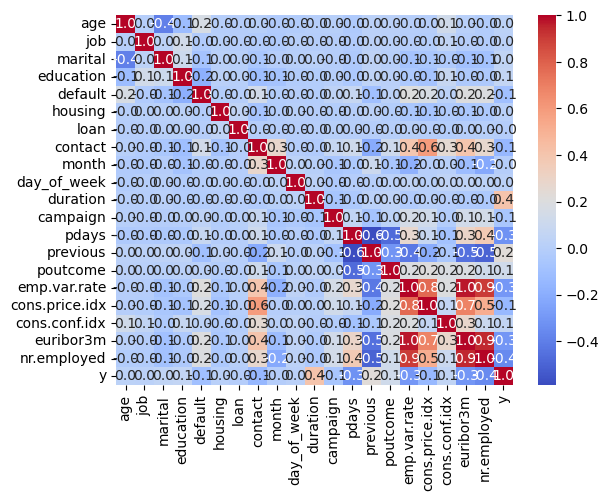

In [27]:
sns.heatmap(data.corr(),annot=True,fmt='.1f',cmap='coolwarm')

<Axes: >

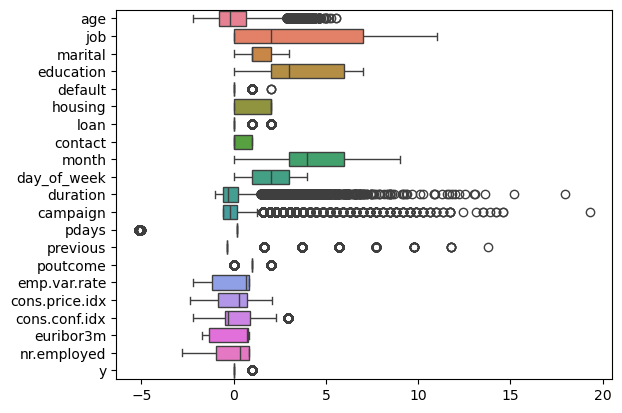

In [28]:
sns.boxplot(data=data,orient='h')

In [29]:
X_class = data.drop('y',axis=1)
y_class = data['y']
X_regr = data.drop('duration',axis=1)
y_regr = data['duration']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X_class,y_class,test_size=0.2)

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier(n_estimators=100)

In [34]:
rfc.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [35]:
y_pred = rfc.predict(X_test)

In [47]:
r2_score(y_test,y_pred)

0.19596092040370994

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_test,y_pred)

array([[7060,  256],
       [ 459,  463]])

In [38]:
data['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X_regr,y_regr,test_size=0.2)

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rfr = RandomForestRegressor(n_estimators=100)

In [42]:
rfr.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
y_pred = rfr.predict(X_test)

In [44]:
from sklearn.metrics import r2_score,mean_absolute_error

In [45]:
r2_score(y_test,y_pred)

0.19596092040370994

In [46]:
mean_absolute_error(y_test,y_pred)

0.6029938673407544